In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from information_estimation import *
from image_utils import *

from led_array.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

Opening BSCCM
Opened BSCCM


## Why does adding to experimental data create problems

In [2]:
edge_crop = 24
patch_size = 20
channel = 'LED119'

num_images = 3000
num_patches = 3000

photons_per_pixel = 150.0

noisy_images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=False)
noisy_patches = extract_patches(noisy_images, patch_size=patch_size, num_patches=num_patches)

clean_images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=False, median_filter=True)
clean_patches = extract_patches(clean_images, patch_size=patch_size, num_patches=num_patches)


In [33]:

unfiltered_patches = add_shot_noise_to_experimenal_data(noisy_patches, photon_fraction=photons_per_pixel / np.mean(noisy_images))
filtered_patches = add_noise(clean_patches * photons_per_pixel / np.mean(clean_images))

Estimated H(Y|X) = 5.586 bits/pixel
Estimated H(Y) = 6.100 bits/pixel
Estimated I(Y;X) = 0.513 bits/pixel
Estimated H(Y|X) = 5.595 bits/pixel
Estimated H(Y) = 6.005 bits/pixel
Estimated I(Y;X) = 0.410 bits/pixel
0.5134996071564872 0.4096822174416159


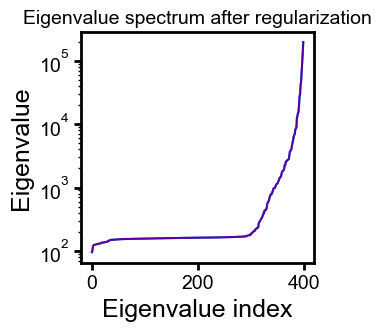

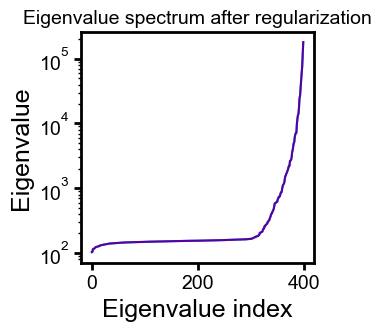

In [35]:
mi_noisy = estimate_mutual_information(unfiltered_patches, show_eigenvalue_plot=True, eigenvalue_floor=1, verbose=True)
mi_filtered = estimate_mutual_information(filtered_patches, show_eigenvalue_plot=True, eigenvalue_floor=1, verbose=True)

print(mi_noisy, mi_filtered)


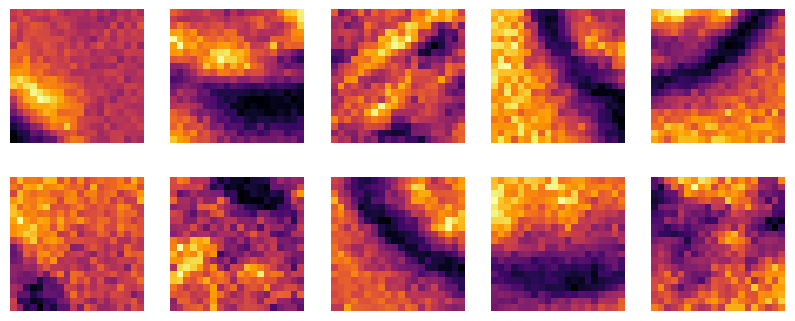

In [34]:
# plot 5 example patches of both
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axes[0, i].imshow(unfiltered_patches[i], cmap='inferno')
    axes[1, i].imshow(filtered_patches[i], cmap='inferno')
    axes[0, i].axis('off')
    axes[1, i].axis('off')


In [31]:
np.std(unfiltered_patches), np.std(filtered_patches)

(Array(46.24307467, dtype=float64), Array(44.40307793, dtype=float64))